<a href="https://colab.research.google.com/github/witkov/CLT/blob/main/notebook_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

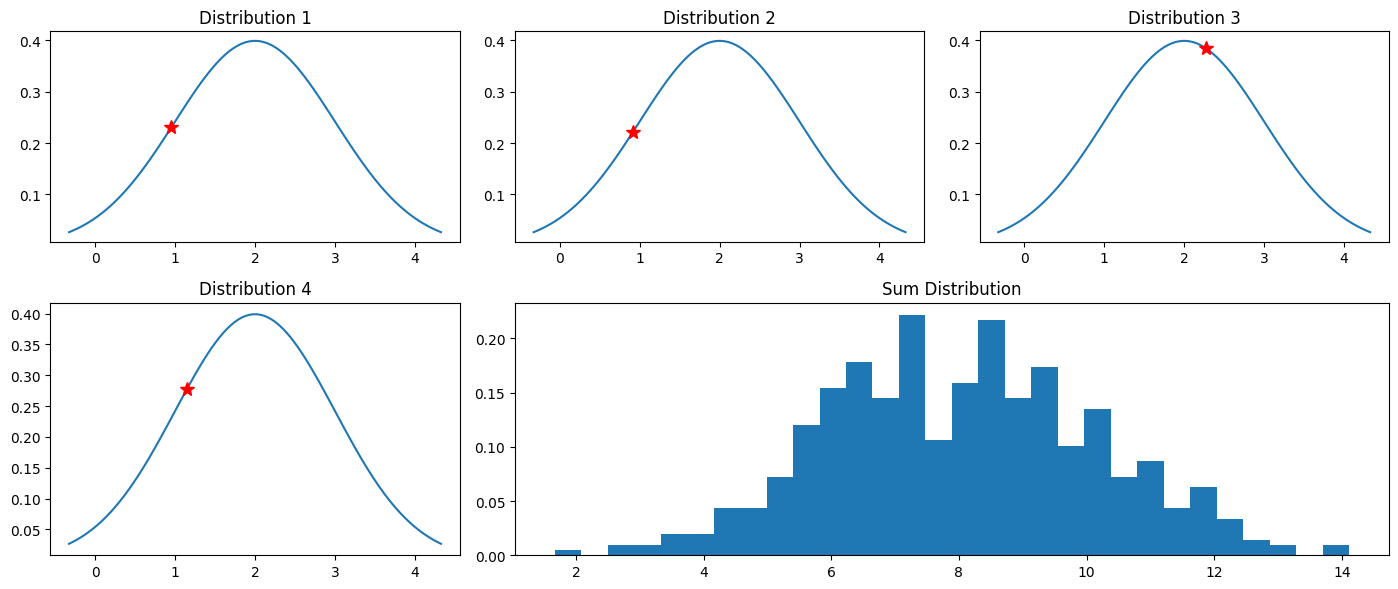

Total trials: 500


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display, clear_output
# by Carey Witkov, inspired by Keith Zengel's Matlab CLT simulator

class CLTPlausibilityGenerator:
    def __init__(self):
        self.distributions = {
            'Normal': stats.norm(loc=2, scale=1),
            'Uniform': stats.uniform(loc=0, scale=3),
            'Exponential': stats.expon(scale=1),
            'Gamma': stats.gamma(a=2, scale=2)
        }
        self.sums = []
        self.fig = None

    def generate_plot(self):
        if self.fig:
            plt.close(self.fig)
        self.fig = plt.figure(figsize=(14, 6))
        gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1.2])  # Wider layout to fit all

        selected_dists = [self.distributions[dist.value] for dist in self.dist_dropdowns]

        for i, dist in enumerate(selected_dists):
            ax = self.fig.add_subplot(gs[i])
            x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
            ax.plot(x, dist.pdf(x))
            sample = dist.rvs()
            ax.plot(sample, dist.pdf(sample), 'r*', markersize=10)
            ax.set_title(f'Distribution {i+1}')

        # Sum distribution on the larger subplot
        self.sums = []
        for _ in range(self.n_samples.value):
            samples = [dist.rvs() for dist in selected_dists]
            self.sums.append(sum(samples))

        ax_sum = self.fig.add_subplot(gs[4:])  # span the last two columns
        ax_sum.hist(self.sums, bins=30, density=True)
        ax_sum.set_title('Sum Distribution')

        plt.tight_layout()
        clear_output(wait=True)
        display(self.controls)
        plt.show()

        last_samples = [dist.rvs() for dist in selected_dists]
        last_sum = sum(last_samples)
        print(f"Total trials: {self.n_samples.value}")

    def reset(self, b):
        self.sums = []
        if self.fig:
            plt.close(self.fig)
        clear_output(wait=True)
        display(self.controls)
        print("Reset complete. Sum Distribution cleared. Click 'Start Simulation' to run a new simulation.")

    def run(self):
        dist_options = list(self.distributions.keys())

        self.dist_dropdowns = [
            widgets.Dropdown(options=dist_options, value='Normal', description=f'Dist {i+1}:')
            for i in range(4)
        ]

        self.n_samples = widgets.IntSlider(min=100, max=10000, step=100, value=500, description='Trials:')

        start_button = widgets.Button(description="Start Simulation")
        reset_button = widgets.Button(description="Reset")

        start_button.on_click(lambda b: self.generate_plot())
        reset_button.on_click(self.reset)

        self.controls = widgets.VBox(self.dist_dropdowns + [self.n_samples, widgets.HBox([start_button, reset_button])])

        display(self.controls)

# Create and run the CLT Plausibility Generator
clt_gen = CLTPlausibilityGenerator()
clt_gen.run()
